## NATURAL  LANGUAGE  PROCESSING 

Natural Language Processing, or NLP, is the sub-field of AI that is focused on enabling computers to understand and process human languages

As long as computers have been around, programmers have been trying to write programs that understand languages like English. The reason is pretty obvious — humans have been writing things down for thousands of years and it would be really helpful if a computer could read and understand all that data.


Computers can’t yet truly understand English in the way that humans do — but they can already do a lot! In certain limited areas, what you can do with NLP already seems like magic. You might be able to save a lot of time by applying NLP techniques to your own project

The process of reading and understanding English is very complex — and that’s not even considering that English doesn’t follow logical and consistent rules. For example, what does this news headline mean?

        **“Environmental regulators grill business owner over illegal coal fires.”** 
        
Are the regulators questioning a business owner about burning coal illegally? Or are the regulators literally cooking the business owner? As you can see, parsing English with a computer is going to be complicated.

Doing anything complicated in machine learning usually means building a pipeline. The idea is to break up your problem into very small pieces and then use machine learning to solve each smaller piece separately. Then by chaining together several machine learning models that feed into each other, you can do very complicated things.


And that’s exactly the strategy we are going to use for NLP. We’ll break down the process of understanding English into small chunks and see how each one works.

### Building an NLP Pipeline, Step-by-Step

**Lets Analyse a Text**
            
           ***London is the capital and most populous city of England and the United Kingdom. Standing on the River Thames in the south east of the island of Great Britain, London has been a major settlement for two millennia. It was founded by the Romans, who named it Londinium.***
           
**This paragraph contains several useful facts. It would be great if a computer could read this text and understand that London is a city, London is located in England, London was settled by Romans and so on. But to get there, we have to first teach our computer the most basic concepts of written language and then move up from there.**

#### Step 1: Sentence Segmentation

**The first step in the pipeline is to break the text apart into separate sentences. That gives us this:**
    
    “London is the capital and most populous city of England and the United Kingdom.”
    
     “Standing on the River Thames in the south east of the island of Great Britain, London has been a major settlement for two millennia.”
    
    “It was founded by the Romans, who named it Londinium.”

**We can assume that each sentence in English is a separate thought or idea. It will be a lot easier to write a program to understand a single sentence than to understand a whole paragraph.**

In [116]:
### NLTK library import 
import nltk
paragraph="""London is the capital and most populous city of England and the United Kingdom. 
            Standing on the River Thames in the south east of the island of Great Britain,London has been a major settlement for two millennia. 
            It was founded by the Romans, who named it Londinium."""

### sent_tokenize separatees the paragraphs and converts it into different sentences and returns a list 
sentences=nltk.sent_tokenize(paragraph)
print(sentences)

['London is the capital and most populous city of England and the United Kingdom.', 'Standing on the River Thames in the south east of the island of Great Britain,London has been a major settlement for two millennia.', 'It was founded by the Romans, who named it Londinium.']


In [117]:
for i,j in zip(sentences,range(len(sentences))):
    print("Sentences NUMBER",j+1,"--")
    print(i)
    print()

Sentences NUMBER 1 --
London is the capital and most populous city of England and the United Kingdom.

Sentences NUMBER 2 --
Standing on the River Thames in the south east of the island of Great Britain,London has been a major settlement for two millennia.

Sentences NUMBER 3 --
It was founded by the Romans, who named it Londinium.



### STEP 2: Word Segmentation 

In [118]:
### from each Sentences we are extracting each words and storing it as list
# Tokenizing words
words = nltk.word_tokenize(paragraph)
print("Different words are ----")
print(words)

Different words are ----
['London', 'is', 'the', 'capital', 'and', 'most', 'populous', 'city', 'of', 'England', 'and', 'the', 'United', 'Kingdom', '.', 'Standing', 'on', 'the', 'River', 'Thames', 'in', 'the', 'south', 'east', 'of', 'the', 'island', 'of', 'Great', 'Britain', ',', 'London', 'has', 'been', 'a', 'major', 'settlement', 'for', 'two', 'millennia', '.', 'It', 'was', 'founded', 'by', 'the', 'Romans', ',', 'who', 'named', 'it', 'Londinium', '.']


#### These are the different words that we have extracted from the paragraph 
**CAUTION--
    Note that the punctuations ,articles ,preposition etc do not play a major role in Analysis and its better to delete them from our words list**

**These Words are called StopWords**

***Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.***

In [119]:
words_before_removal=words
print("No of Words=",len(words_before_removal))
print(words_before_removal)

No of Words= 53
['London', 'is', 'the', 'capital', 'and', 'most', 'populous', 'city', 'of', 'England', 'and', 'the', 'United', 'Kingdom', '.', 'Standing', 'on', 'the', 'River', 'Thames', 'in', 'the', 'south', 'east', 'of', 'the', 'island', 'of', 'Great', 'Britain', ',', 'London', 'has', 'been', 'a', 'major', 'settlement', 'for', 'two', 'millennia', '.', 'It', 'was', 'founded', 'by', 'the', 'Romans', ',', 'who', 'named', 'it', 'Londinium', '.']


In [120]:
### STOPWORDS
from nltk.corpus import stopwords
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [word for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)
    
print(sentences)    


['London capital populous city England United Kingdom .', 'Standing River Thames south east island Great Britain , London major settlement two millennia .', 'It founded Romans , named Londinium .']


In [121]:
words_after_removal=[]

for i in sentences:
    sentence_words=i.split(' ')
    #print(sentence_words)
    for j in sentence_words:
        words_after_removal.append(j)
        
        
print("No of words after removal of stopwords=",len(words_after_removal))
print(words_after_removal)

No of words after removal of stopwords= 30
['London', 'capital', 'populous', 'city', 'England', 'United', 'Kingdom', '.', 'Standing', 'River', 'Thames', 'south', 'east', 'island', 'Great', 'Britain', ',', 'London', 'major', 'settlement', 'two', 'millennia', '.', 'It', 'founded', 'Romans', ',', 'named', 'Londinium', '.']


**We can see that several words got removed as they we not needed** 

In [122]:
## REMOVED WORDS 
removed_words=[i for i in words_before_removal if i not in words_after_removal]
print("No of removed words",len(removed_words))
print(removed_words)

No of removed words 23
['is', 'the', 'and', 'most', 'of', 'and', 'the', 'on', 'the', 'in', 'the', 'of', 'the', 'of', 'has', 'been', 'a', 'for', 'was', 'by', 'the', 'who', 'it']


### STEP 3:Predicting Parts of Speech for Each Token

**We’ll look at each token and try to guess its part of speech — whether it is a noun, a verb, an adjective and so on. Knowing the role of each word in the sentence will help us start to figure out what the sentence is talking about.**

**part-of-speech tagger, or POS-tagger, processes a sequence of words, and attaches a part of speech tag to each word**

**POS tag list:

    CC coordinating conjunction
    CD cardinal digit
    DT determiner
    EX existential there (like: "there is" ... think of it like "there exists")
    FW foreign word
    IN preposition/subordinating conjunction
    JJ adjective 'big'
    
    JJR adjective, comparative 'bigger'
    JJS adjective, superlative 'biggest'
    LS list marker 1)
    MD modal could, will
    NN noun, singular 'desk'
    NNS noun plural 'desks'
    NNP proper noun, singular 'Harrison'
    NNPS proper noun, plural 'Americans'
    PDT predeterminer 'all the kids'
    POS possessive ending parent's
    PRP personal pronoun I, he, she
    
    RB adverb very, silently,
    RBR adverb, comparative better
    RBS adverb, superlative best
    RP particle give up
    TO to go 'to' the store.
    
    UH interjection errrrrrrrm
    VB verb, base form take
    VBD verb, past tense took
    VBG verb, gerund/present participle taking
    VBN verb, past participle taken
    VBP verb, sing. present, non-3d take
    VBZ verb, 3rd person sing. present takes
    WDT wh-determiner which
    WP wh-pronoun who, what
    WRB wh-abverb where, when
    WP$ possessive wh-pronoun whose
    PRP$ possessive pronoun my, his, hers**

In [123]:
nltk.pos_tag(words_before_removal)

[('London', 'NNP'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('capital', 'NN'),
 ('and', 'CC'),
 ('most', 'RBS'),
 ('populous', 'JJ'),
 ('city', 'NN'),
 ('of', 'IN'),
 ('England', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('Kingdom', 'NNP'),
 ('.', '.'),
 ('Standing', 'VBG'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('River', 'NNP'),
 ('Thames', 'NNP'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('south', 'JJ'),
 ('east', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('island', 'NN'),
 ('of', 'IN'),
 ('Great', 'NNP'),
 ('Britain', 'NNP'),
 (',', ','),
 ('London', 'NNP'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('major', 'JJ'),
 ('settlement', 'NN'),
 ('for', 'IN'),
 ('two', 'CD'),
 ('millennia', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ('was', 'VBD'),
 ('founded', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('Romans', 'NNPS'),
 (',', ','),
 ('who', 'WP'),
 ('named', 'VBD'),
 ('it', 'PRP'),
 ('Londinium', 'NNP'),
 ('.', '.')]

In [124]:
sentences

['London capital populous city England United Kingdom .',
 'Standing River Thames south east island Great Britain , London major settlement two millennia .',
 'It founded Romans , named Londinium .']

### STEMMING 
**Stemming achieves the root word by cutting the last alphabet letters of a word. These root words are also known as stems. 
But stem not always become a root word. And the sentence becomes meaningless. Stemming also reduces the accuracy of a model.**


In [125]:
import re

from nltk.stem import PorterStemmer
#Creating Stemmer object 
stemmer=PorterStemmer()

#tokenize into sentences 
sentences=nltk.sent_tokenize(paragraph)
#tokenize into words

#stemming
#remove punctuations also
for i in range(len(sentences)):
    words=re.sub('[^a-zA-Z]',' ',sentences[i])
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i]=''.join(words)
    
print(sentences)

['Lnn  he cpl n  ppulu c f Engln n he Une Kng ', 'Snng n he Rver The n he uh e f he ln f Gre Brn Lnn h been  jr eleen fr w llenn ', 'I w fune b he Rn  wh ne  Lnnu ']


**We can see that the words after tokenizing and reducing are transformed but they are not legitimate and not understandable**

## Lemmatization

**Lemmatization method has analyzed the structure of words, the relationship between words and parts of words to accurately identify the root word. Part of speech tagger and vocabulary words helps to return the dictionary form of a word. But this requires a lot of processing time and disk space. The accuracy of the NLP model is comparatively high in this method. The root word is known as a lemma.**

In [126]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

#Creating Lemmatisation object 
lemmatizer = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)

for i in range(len(sentences)):
    #tokenize into words
    words = nltk.word_tokenize(sentences[i])
    
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)

print(sentences)

['London capital populous city England United Kingdom .', 'Standing River Thames south east island Great Britain , London major settlement two millennium .', 'It founded Romans , named Londinium .']


**We can see that the words after tokenizing and reducing are transformed but they are legitimate and not understandable**

## BAG OF WORDS

**The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears. This process is often referred to as vectorization**

**Visit this link for more info 
https://youtu.be/IKgBLTeQQL8 ***

**Implementation**

<a> <img src='https://miro.medium.com/max/700/1*3IACMnNpwVlCl8kSTJocPA.png' /></a>

In [127]:
# Cleaning the texts
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
ls=WordNetLemmatizer()

paragraph='''Tommy cat sat sat sat in the wat.
            Tommy cat sat in Tommy hat.
            the cat with the Tommy hat.'''
sentences = nltk.sent_tokenize(paragraph)

corpus_stem = []
corpus_lem=[]


for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review_stem = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review_lem = [ls.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]

    review_stem = ' '.join(review_stem)
    review_lem = ' '.join(review_lem)
    
    corpus_stem.append(review_stem)
    corpus_lem.append(review_lem)
    
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X_stem = cv.fit_transform(corpus_stem).toarray()
X_lem = cv.fit_transform(corpus_lem).toarray()



In [128]:
print(review_stem)
print(review_lem)

cat tommi hat
cat tommy hat


In [129]:
print(corpus_stem)

['tommi cat sat sat sat wat', 'tommi cat sat tommi hat', 'cat tommi hat']


In [130]:
X_stem

array([[1, 0, 3, 1, 1],
       [1, 1, 1, 2, 0],
       [1, 1, 0, 1, 0]], dtype=int64)

In [131]:
print(corpus_lem)

['tommy cat sat sat sat wat', 'tommy cat sat tommy hat', 'cat tommy hat']


In [132]:
X_lem

array([[1, 0, 3, 1, 1],
       [1, 1, 1, 2, 0],
       [1, 1, 0, 1, 0]], dtype=int64)

## TF-IDF Term Frequency - Inverse Document Frequency  

**TF-IDF or ( Term Frequency(TF) — Inverse Dense Frequency(IDF) )is a technique which is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers**


**TF-IDF is useful in solving the major drawbacks of Bag of words by introducing an important concept called inverse document frequency.
It’s a score which the machine keeps where it is evaluates the words used in a sentence and measures it’s usage compared to words used in the entire document. In other words, it’s a score to highlight each word’s relevance in the entire document. It’s calculated as -

**IDF =Log( Number of documents) / (Number of documents containing the word)]

**TF = (Number of repetitions of word in a document) / (# of words in a document)**

**how many times is beauty used in that entire document, give me a probability and IDF answers questions like how important is the word beauty in the entire list of documents, is it a common theme in all the**

**Document_1-- It is going to rain today**

**Document_2-- Today I am not going outside**

**Document_3 -- I am going to watch the season premiere.**


<a> <img src='https://miro.medium.com/max/447/1*4e7_738WtUgkKSdumJfQ1Q.png'> <img src='https://miro.medium.com/max/341/1*pWR7LSh3Ui9ADTqRrcbTcw.png'/> <img src='https://miro.medium.com/max/688/1*58b3x6cd6SefwgERcaGamg.png'/> <img src='https://miro.medium.com/max/552/1*goSIDb32U3DflYNrKUXQHQ.png' > <img src='https://miro.medium.com/max/700/1*OXjZ3vpUk-T3kyZL4Ytncw.png'/></a>


**For more information please visit https://youtu.be/D2V1okCEsiE**

In [133]:
#term frequency and inverse document frreq
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
ls=WordNetLemmatizer()

paragraph='''Tommy cat sat sat sat in the wat.
            Tommy cat sat in Tommy hat.
            the cat with the Tommy hat.'''


sentences = nltk.sent_tokenize(paragraph)

corpus_stem = []
corpus_lem=[]


for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review_stem = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review_lem = [ls.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]

    review_stem = ' '.join(review_stem)
    review_lem = ' '.join(review_lem)
    
    corpus_stem.append(review_stem)
    corpus_lem.append(review_lem)
    

cv2=TfidfVectorizer(max_features = 1500)
X_stem = cv2.fit_transform(corpus_stem).toarray()
X_lem = cv2.fit_transform(corpus_lem).toarray()

In [134]:
X_stem

array([[0.22479078, 0.        , 0.86837717, 0.22479078, 0.38060387],
       [0.34676577, 0.44652407, 0.44652407, 0.69353155, 0.        ],
       [0.52284231, 0.67325467, 0.        , 0.52284231, 0.        ]])

In [135]:
X_lem

array([[0.22479078, 0.        , 0.86837717, 0.22479078, 0.38060387],
       [0.34676577, 0.44652407, 0.44652407, 0.69353155, 0.        ],
       [0.52284231, 0.67325467, 0.        , 0.52284231, 0.        ]])

## Basic Sentiment Analysis using NLTK

### What is Sentiment Analysis?

***Sentiment analysis is a type of data mining that measures the inclination of people’s opinions through natural language processing (NLP), computational linguistics and text analysis, which are used to extract and analyze subjective information from the Web — mostly social media and similar sources. The analyzed data quantifies the general public’s sentiments or reactions toward certain products, people or ideas and reveal the contextual polarity of the information. Sentiment analysis is also known as opinion mining.***

### VADER

**VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.**

**VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.**

In [136]:
#module to do sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
Sentiment_object=SentimentIntensityAnalyzer()


#lets check what does this SentimentIntensityAnalyser gives us
a="this is an awesome movie with great cinematic effects and soothing music"
#polarity scores gives me scores of my emotion
print(Sentiment_object.polarity_scores(a))


{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.8885}


In [137]:
b="Horrible movie with a lot of nudity and crooked story line . This movie also lacks good direction and script"
print(Sentiment_object.polarity_scores(b))

{'neg': 0.156, 'neu': 0.714, 'pos': 0.129, 'compound': -0.1531}


**neg is negative quotient**

**neu is neutral quotient**

**pos is positive quotient**

**The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). positive sentiment : (compound score >= 0.05)**

## AMAZON REVIEWS SENTIMENT ANALYSIS

In [138]:
import pandas as pd
import numpy as np 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent_obj=SentimentIntensityAnalyzer()   # object of the Sentiment_Intensity_Analyser



In [139]:
AmazonReviews=pd.read_csv('C:/Users/My PC/Desktop/amazonreviews2.tsv',sep='\t')
AmazonReviews.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


neg    5097
pos    4903
Name: label, dtype: int64


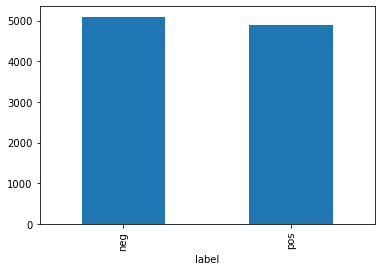

In [140]:
print(AmazonReviews['label'].value_counts())
AmazonReviews.groupby('label').size().plot(kind='bar')

In [141]:
#checking for null values
print(AmazonReviews.isna().sum())
#had there been null values ---
AmazonReviews.dropna(inplace=True)

label     0
review    0
dtype: int64


In [142]:
AmazonReviews.shape

(10000, 2)

In [143]:
#suppose if there are spaces in my dataset then I must check that and remove them also
empty_entry=[]
for i,label,review in AmazonReviews.itertuples():
    if type(review)==str:
        if review.isspace():
            empty_entry.append(i)
print(empty_entry)


#remove all the indexs that are returned in empty_entry list
AmazonReviews.drop(empty_entry,inplace=True)

[]


In [144]:
#just to check 
#how my first review is 
print(AmazonReviews.loc[0]['review'])
sent_obj.polarity_scores(AmazonReviews.loc[0]['review'])

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^


{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

#### ADDING SCORES COLUMN IN OUR DATASET

In [145]:
#### so similarly doing the same stuff for the entire dataset
AmazonReviews['scores']=AmazonReviews['review'].apply(lambda review: sent_obj.polarity_scores(review))
AmazonReviews.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [146]:
### extracting the compound score and column binding it
AmazonReviews['compound']=AmazonReviews['scores'].apply(lambda score_dict: score_dict['compound'])
AmazonReviews.head()

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [147]:
#### #based on my SentimentIntensityAnalyser what is my output i have listed that and stored in comp_score column
AmazonReviews['comp_score']=AmazonReviews['compound'].apply(lambda x : "pos" if x>=0 else "neg")
AmazonReviews.head()

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


## Confusion_Matrix ------ Accuracy_score------Classification_Report

In [148]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_true=AmazonReviews['label'],y_pred=AmazonReviews['comp_score'])

array([[2623, 2474],
       [ 434, 4469]], dtype=int64)

In [149]:
accuracy_score(AmazonReviews['label'],AmazonReviews['comp_score'])
#inference --cannot make out the sarcasm

0.7092

In [150]:
print(classification_report(AmazonReviews['label'],AmazonReviews['comp_score']))

              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



## SPAM CLASSIFIER USING NAVIE'S BAYEs CLASSIFER

In [151]:
import pandas as pd
import nltk 
from nltk.stem import WordNetLemmatizer
import re
Data=pd.read_csv('C:/Users/My PC/Downloads/spam.csv',encoding='latin-1')
Data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**We dont require the Unnamed2,3,4 columns  and so we must drop them**

In [152]:
Data=Data[['v1','v2']]

In [153]:
Data.rename(columns={'v1':'label','v2':'message'},inplace=True)
Data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Visualizing data
Let us see which are the most repeated words in the spam messages! We are going to use WordCloud library for this purpose.

### SPAM MESSAGES

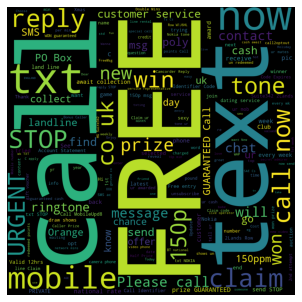

Text Cloud for Spam Messages


In [154]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
%matplotlib inline
spam_words=' '.join(list(Data[Data['label']=='spam']['message']))
spam_wc=WordCloud(width=1024,height=1024).generate(spam_words)
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print("Text Cloud for Spam Messages")

**As expected, these messages mostly contain the words like ‘FREE’, ‘call’, ‘text’, ‘ringtone’, ‘prize claim’ etc.**

### NON SPAM MESSAGES

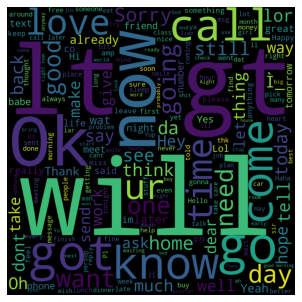

Text Cloud for NON SPAM Messages


In [155]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
%matplotlib inline
spam_words=' '.join(list(Data[Data['label']=='ham']['message']))
spam_wc=WordCloud(width=1024,height=1024).generate(spam_words)
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print("Text Cloud for NON SPAM Messages")


In [156]:
from nltk.corpus import stopwords
lem=WordNetLemmatizer()
corpus = []
for i in range(0, len(Data)):
    review = re.sub('[^a-zA-Z]', ' ', Data['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [lem.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [157]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [158]:
### Creating the Tf-idf model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(Data['label'])
y=y.iloc[:,0].values

In [159]:
### Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print("Training Data",X_train.shape)
print("Testing Data",X_test.shape)

Training Data (4457, 2500)
Testing Data (1115, 2500)


In [160]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [161]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [162]:
Test=pd.DataFrame({'actual':y_test,'predicted':y_pred})
Test.head()

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


## MODEL EVALUATION

In [163]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_true=Test['actual'],y_pred=Test['predicted'])

array([[140,  26],
       [  0, 949]], dtype=int64)

In [164]:
print(classification_report(Test['actual'],Test['predicted']))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92       166
           1       0.97      1.00      0.99       949

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [165]:
accuracy_score(Test['actual'],Test['predicted'])

0.9766816143497757

## Hope you have learnt the basics of NLP, spam classification  and sentiment analysis **